# Dataset

-    Every player available in FIFA 20
-    100+ attributes
-    URL of the scraped player
-    Player positions, with the role in the club and in the national team
-    Player attributes with statistics as Attacking, Skills, Defense, Mentality, GK Skills, etc.
-    Player personal data like Nationality, Club, DateOfBirth, Wage, Salary, etc.


# Links

- [FIFA 20 Player attributes](https://www.fifauteam.com/fifa-20-attributes-guide/)
- [Slides](https://sites.google.com/view/aprendizaje-no-supervisado/)
- [Data source - sofifa page](https://sofifa.com/)

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [2]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

In [3]:
df=pd.read_csv("players_20.csv")
df.head(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,...,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,...,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,...,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,...,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# First let's explore the features of the dataset

# Features - Attributes

In [87]:
pd.set_option('display.max_seq_items', None)
print('There are', len(df.columns), 'features')
df.columns

There are 104 features


Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'team_position', 'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_

In [69]:
identifier_features = ["sofifa_id", "short_name", "long_name","overall"]

The features can be divided in a few categories:
- Goalkeeping
- Physical
- Defending
- Shooting
- Pace
- Dribbling
- Passing

# Goalkeepers attributes

<img src="imgs/goalkeepers.png" />


* **Diving**: Diving is GK’s ability to make a save whilst diving through the air. It is directly affected by the player’s **height**.
* **Handling**: Handling is an exclusive goalkeeper attribute used to measures how cleanly he catches the ball and does he hold on to it. In other words, it is the frequency that the keeper catches the ball rather than parrying it and whether or not he holds onto it.
* **Kicking**: Kicking it’s another attribute that only goalkeepers have, used to measures the length and accuracy of goal kicks, from out of the hands or on the ground. The length and accuracy of throws are partially determined by the kicking attribute but mainly determined by the long throw trait. 
* **GK_Positioning**: Positioning for goalkeepers is slightly different. It is the GK’s ability to position himself correctly when saving shots. It also affects the way how a goalkeeper reacts to crosses.
* **Reflexes**: Reflexes stat is the agility of the goalkeeper when making a save. In other words, it determines how quickly the goalkeeper reacts to a shot on goal. If the stat is low he will make a move later or could miss it entirely.
* **Speed**: This is another stat that only goalkeepers have. It is the ability to close down an opponent in one-on-one situations. This attribute is especially important if you use the off-side trap to stop your opponents.

In [70]:
gk_features = identifier_features + ["gk_diving","gk_handling","gk_positioning","gk_reflexes","gk_speed"]
goalkeepers = df[gk_features].dropna(subset=gk_features)

In [36]:
goalkeepers.head(3)

,sofifa_id,short_name,long_name,overall,gk_diving,gk_handling,gk_positioning,gk_reflexes,gk_speed
3,200389,J. Oblak,Jan Oblak,91,87.0,92.0,90.0,89.0,52.0
6,192448,M. ter Stegen,Marc-André ter Stegen,90,88.0,85.0,88.0,90.0,45.0
13,212831,Alisson,Alisson Ramses Becker,89,85.0,84.0,90.0,89.0,51.0


In [35]:
goalkeepers.describe()

,sofifa_id,overall,gk_diving,gk_handling,gk_positioning,gk_reflexes,gk_speed
count,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000
mean,213512.369352,64.796660,65.422397,63.146365,63.374754,66.390472,37.798625
std,35994.426746,7.603627,7.736278,7.244023,8.447876,8.154062,10.634038
min,1179.000000,48.000000,44.000000,42.000000,41.000000,45.000000,12.000000
25%,197604.750000,60.000000,60.000000,58.000000,58.000000,60.750000,29.000000
50%,222925.500000,65.000000,65.000000,63.000000,64.000000,66.000000,39.000000
75%,239801.750000,70.000000,70.000000,68.000000,69.000000,72.000000,46.000000
max,252905.000000,91.000000,90.000000,92.000000,91.000000,92.000000,65.000000


## Goalkeepers overall performance vs global performance

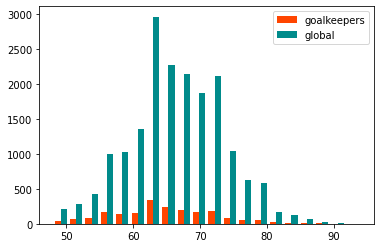

In [71]:
x = goalkeepers['overall']
y= df['overall']
plt.hist([x, y], bins=20, label=['goalkeepers', 'global'],color = ["orangered","darkcyan"], lw=0)
plt.legend(loc='upper right')
plt.show()

# Physical Attributes

<img src="imgs/physical.png"/>

* **Aggression**:measures the frequency and the aggression of jostling, tackling and slide tackling. It is the attribute which determines the player’s power of will or commitment to a match.
* **Jumping**:Jumping is the player’s ability and quality for jumping from the surface for headers. The higher the value is, the higher the player can jump. Like many others, this one is fairly useless without its *related attributes*. For example, for a player to be really good in the air, he needs to have high jumping, strength aggression and heading accuracy stats. Obviously, his height may also help a lot. A very tall player does not need to have a high jumping attribute to connect to the ball.
* **Stamina**: Stamina determines the rate at which a player will tire during a game. It evaluates how tired your player gets as the match approaches half time or full time.
* **Strength**: Strength is about the quality or state of being physically strong. The higher the value, the more likely the player will win a physical challenge. Your player’s strength stat will decide how they cope with any physical battles, so a good score in this area is important for anyone with defensive responsibilities. It’s also a desirable attribute to have for at least one of your strikers, just to give you a chance in 50-50s with defenders.

In [ ]:
#for debug
pd.set_option('display.max_seq_items', None)
[x  for x in df.columns.sort_values() if "st" in x]

In [76]:
physical_features = identifier_features + ["power_strength","power_stamina","power_jumping","mentality_aggression"]
physical = df[physical_features]
physical.describe()

,sofifa_id,overall,power_strength,power_stamina,power_jumping,mentality_aggression
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,66.244994,65.234763,62.889485,64.928165,55.742149
std,27960.200461,6.949953,12.534811,16.017954,11.934059,17.318157
min,768.000000,48.000000,20.000000,12.000000,19.000000,9.000000
25%,204445.500000,62.000000,58.000000,56.000000,58.000000,44.000000
50%,226165.000000,66.000000,66.000000,66.000000,66.000000,58.000000
75%,240795.750000,71.000000,74.000000,74.000000,73.000000,69.000000
max,252905.000000,94.000000,97.000000,97.000000,95.000000,95.000000


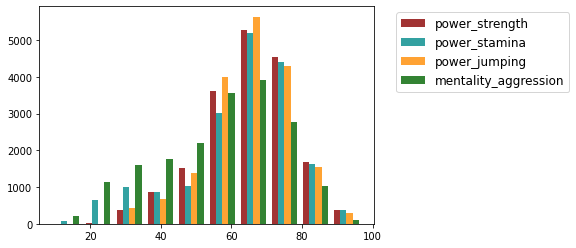

In [130]:
hists = []
phys_features = ["power_strength","power_stamina","power_jumping","mentality_aggression"]
for x in phys_features:
    hists.append(physical[x])
plt.hist(hists, bins=10, label = phys_features,color=['darkred','darkcyan', 'darkorange','darkgreen'], alpha=.8)
plt.legend(loc='upper right',bbox_to_anchor=(1.6, 1),fontsize='large')
plt.show()

# Defending Attributes

<img src="imgs/defending.png"/>

* **Heading accuracy**: This stats measures the heading accuracy of the player for either a pass or a shot.
* **Interceptions**: Interception determines the ability to read the game and intercept passes.
* **Marking**: Marking is the ability to track and defend an opposing player. In other words, it is player’s ability to stay close to an opposing attacker and stop him getting to a cross/pass from a teammate. Also contributes to tracking runs.
* **Sliding tackle**: This stats measures the ability of the player to time sliding tackles so that they win the ball rather than give away a foul.
* **Standing tackle**: This stats measures the ability of the player to time sliding tackles so that they win the ball rather than give away a foul.

In [115]:
#for debug
#international_reputation
pd.set_option('display.max_seq_items', None)
[x  for x in df.columns.sort_values() if "def" in x]

['defending',
 'defending_marking',
 'defending_sliding_tackle',
 'defending_standing_tackle']

In [121]:
defending_features = identifier_features + ["defending_standing_tackle","defending_sliding_tackle","attacking_heading_accuracy","mentality_interceptions","defending_marking"]
defending = df[defending_features]
defending.head(1)

,sofifa_id,short_name,long_name,overall,defending_standing_tackle,defending_sliding_tackle,attacking_heading_accuracy,mentality_interceptions,defending_marking
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,94,37,26,70,40,33


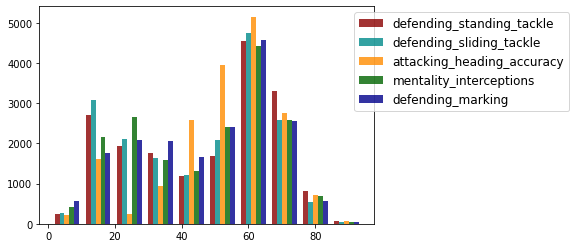

In [137]:
hists = []
def_features = ["defending_standing_tackle","defending_sliding_tackle","attacking_heading_accuracy","mentality_interceptions","defending_marking"]
for x in def_features:
    hists.append(defending[x])
plt.hist(hists, bins=10, label = def_features,color=['darkred','darkcyan', 'darkorange','darkgreen', 'darkblue'], alpha=.8)
plt.legend(loc='upper right',bbox_to_anchor=(1.6, 1),fontsize='large')
plt.show()